In [100]:
#Scarpping and cleaning data from google play strore for one specific app

In [101]:
pip install google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [9]:
from google_play_scraper import app, reviews, Sort
import pandas as pd

def scrape_app_data(package_name):

    try:
        app_info = app(
            package_name,
            lang='en',  
            country='in'  
        )

        print("App Title:", app_info['title'])
        print("App Rating:", app_info['score'])
        print("Total Reviews:", app_info['reviews'])
        print("Total Installs:", app_info['installs'])
        print("Developer Name:", app_info['developer'])
        print("Description:", app_info['description'])
        
        return app_info

    except Exception as e:
        print("Error in fetching app data:", str(e))
        return None
    
def scrape_app_reviews(package_name, review_count=10000):

    try:
        app_reviews, _ = reviews(
            package_name,
            lang='en',
            country='in',
            sort=Sort.NEWEST,  # Sorting the reviews by time
            count=review_count,  # Number of reviews to fetch
        )

        # Converting the data into a dataframe
        df_reviews = pd.DataFrame(app_reviews)

        # Droping unnecessary columns and adding necessary columns
        df_reviews.drop(columns=["userImage", "thumbsUpCount", "replyContent", "repliedAt"], inplace=True)
        df_reviews.insert(0, 'Serial Number', range(1, len(df_reviews) + 1))

        return df_reviews

    except Exception as e:
        print("Error fetching reviews:", str(e))
        return None

def scrape_app_reviews_positive(package_name, review_count=10000):

    try:
        app_reviews, _ = reviews(
            package_name,
            lang='en',
            country='in',
            sort=Sort.NEWEST,  # Sorting the reviews by time
            count=review_count,  # Number of reviews to fetch
            filter_score_with=5
        )

        # Converting the data into a dataframe
        df_reviews = pd.DataFrame(app_reviews)

        # Droping unnecessary columns and adding necessary columns
        df_reviews.drop(columns=["userImage", "thumbsUpCount", "replyContent", "repliedAt"], inplace=True)
        df_reviews.insert(0, 'Serial Number', range(1, len(df_reviews) + 1))

        return df_reviews

    except Exception as e:
        print("Error fetching reviews:", str(e))
        return None
    
def scrape_app_reviews_negative(package_name, review_count=10000):

    try:
        app_reviews, _ = reviews(
            package_name,
            lang='en',
            country='in',
            sort=Sort.NEWEST,  # Sorting the reviews by time
            count=review_count,  # Number of reviews to fetch
            filter_score_with=1
        )

        # Converting the data into a dataframe
        df_reviews = pd.DataFrame(app_reviews)

        # Droping unnecessary columns and adding necessary columns
        df_reviews.drop(columns=["userImage", "thumbsUpCount", "replyContent", "repliedAt"], inplace=True)
        df_reviews.insert(0, 'Serial Number', range(1, len(df_reviews) + 1))

        return df_reviews

    except Exception as e:
        print("Error fetching reviews:", str(e))
        return None



In [10]:

if __name__ == "__main__":
    package_name = input("Enter the package name of the app (e.g., 'com.flipkart.android'): ")  
    app_data = scrape_app_data(package_name)
    
    if app_data:
        # Scraping reviews for the app
        df_reviews = scrape_app_reviews(package_name, review_count=1000)
        df_reviews_positive = scrape_app_reviews_positive(package_name, review_count=1000)
        df_reviews_negative = scrape_app_reviews_negative(package_name, review_count=1000)
        
        if df_reviews is not None:
            print(f'\nReviews:\n{df_reviews.head()}')
            
        if df_reviews_positive is not None:
            print(f'\nPositive Reviews:\n{df_reviews_positive.head()}')
            
        if df_reviews_negative is not None:
            print(f'\nNegative Reviews:\n{df_reviews_negative.head()}')
            
            df_reviews.to_csv('app_reviews.csv', index=False)
            df_reviews_positive.to_csv('app_reviews_positive.csv', index=False)
            df_reviews_negative.to_csv('app_reviews_negative.csv', index=False)
            
            print("\nReviews saved to app_reviews.csv")
            print("\nPositive Reviews saved to app_reviews_positive.csv")
            print("\nNegativeReviews saved to app_reviews_negative.csv")

Enter the package name of the app (e.g., 'com.flipkart.android'): com.flipkart.android
App Title: Flipkart Online Shopping App
App Rating: 4.2900743
Total Reviews: 9222832
Total Installs: 500,000,000+
Developer Name: Flipkart
Description: Flipkart brings you the thrill of discovery with a treasure trove of products—mobiles, fashion, electronics, home appliances, groceries, and more. It's your one-stop shop with amazing discounts, SuperCoins on every purchase, fun rewards, and timely deal alerts. A new addition is Flipkart Minutes, where you get everything you need delivered in just 10 minutes! All wrapped in one app built for your ultimate convenience. Explore it all in your language

Top reasons to download:
1️⃣0️⃣⌛ 🛍️ Flipkart Minutes: Forgot to grab the groceries? Need a last-minute gift? Prepping for a party? Or just realized you’re out of your favorite snacks? Flipkart Minutes delivers everything you need & want in just 10 minutes! From the freshest fruits & veggies to the latest 

In [12]:
#Sentiment Analysis Using TextBlob

In [13]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [15]:
from textblob import TextBlob

def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

# Applying sentiment analysis on our dataframe
df_reviews['sentiment'] = df_reviews['content'].apply(get_sentiment)
df_reviews['sentiment_label'] = df_reviews['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


print(df_reviews[['content', 'sentiment_label']].head())


                                   content sentiment_label
0  Record live shopping car menu in Chala.        Positive
1                                     Good        Positive
2                                   nice 👍        Positive
3                         good application        Positive
4                                Very nice        Positive


In [16]:
# Topic Modeling Using Latent Dirichlet Allocation (LDA)

In [17]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [19]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /Users/avssp/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/avssp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Load the stopwords
stop_words = set(stopwords.words('english'))

# Tokenizing and removing stopwords from positive and negative reviews
df_reviews_positive['tokens'] = df_reviews_positive['content'].apply(lambda x: [word for word in word_tokenize(x) if word.lower() not in stop_words])
df_reviews_negative['tokens'] = df_reviews_negative['content'].apply(lambda x: [word for word in word_tokenize(x) if word.lower() not in stop_words])

# Creating a dictionary and a corpus for positive reviews
dictionary_positive = corpora.Dictionary(df_reviews_positive['tokens'])
corpus_positive = [dictionary_positive.doc2bow(text) for text in df_reviews_positive['tokens']]

# Creating a dictionary and a corpus for negative reviews
dictionary_negative = corpora.Dictionary(df_reviews_negative['tokens'])
corpus_negative = [dictionary_negative.doc2bow(text) for text in df_reviews_negative['tokens']]

# Perform LDA (Latent Dirichlet Allocation) to find topics
lda_model_positive = gensim.models.ldamodel.LdaModel(corpus_positive, num_topics=5, id2word=dictionary_positive, passes=10)
lda_model_negative = gensim.models.ldamodel.LdaModel(corpus_negative, num_topics=5, id2word=dictionary_negative, passes=10)

# Printing the identified topics for positive reviews
print("Positive Review Topics:")
for idx, topic in lda_model_positive.print_topics(-1):
    print(f'Topic {idx+1}: {topic}')

# Printing the identified topics for negative reviews
print("\nNegative Review Topics:")
for idx, topic in lda_model_negative.print_topics(-1):
    print(f'Topic {idx+1}: {topic}')


Positive Review Topics:
Topic 1: 0.119*"super" + 0.029*"product" + 0.022*"." + 0.020*"jaldi" + 0.012*"happy" + 0.012*"quality" + 0.011*"flipkart" + 0.010*"fast" + 0.008*"Diwali" + 0.008*"one"
Topic 2: 0.247*"nice" + 0.053*"👍" + 0.032*"app" + 0.020*"excellent" + 0.018*"awesome" + 0.012*"great" + 0.012*"👍👍" + 0.011*"Flipkart" + 0.010*"flipkart" + 0.010*","
Topic 3: 0.370*"good" + 0.028*"👍" + 0.018*"service" + 0.014*"Nice" + 0.011*"'s" + 0.010*"thanks" + 0.009*"Flipkart" + 0.008*"product" + 0.008*"😊" + 0.008*"."
Topic 4: 0.054*"Good" + 0.032*"hai" + 0.013*"aap" + 0.010*"best" + 0.009*"much" + 0.009*"service" + 0.008*"thank" + 0.008*"xx" + 0.008*"ji" + 0.008*"get"
Topic 5: 0.055*"best" + 0.052*"app" + 0.029*"ok" + 0.014*"hai" + 0.012*"Flipkart" + 0.009*"product" + 0.009*"." + 0.008*"wow" + 0.008*"Super" + 0.008*"ke"

Negative Review Topics:
Topic 1: 0.027*"Flipkart" + 0.024*"," + 0.018*"." + 0.012*"bad" + 0.012*"app" + 0.010*"hai" + 0.008*"n't" + 0.007*"order" + 0.006*"ki" + 0.006*"time"
T

In [22]:
#Gaining Insights using cohere ai api inference

In [23]:
import os
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [24]:
pip install cohere --upgrade


Note: you may need to restart the kernel to use updated packages.


In [45]:
# For positive topics
input_prompt_positive = (
    "We have conducted a thorough analysis of positive app reviews using Latent Dirichlet Allocation (LDA), resulting in the following topics:\n\n"
    + "\n".join(formatted_positive_topics) + "\n\n"
    "Your task is to provide actionable insights based on these topics. Please consider the following points:\n"
    "1. Identify specific strengths and positive attributes highlighted in each topic.\n"
    "2. Suggest strategies for enhancing customer satisfaction based on the positive aspects mentioned.\n"
    "3. Recommend ways to leverage these positive attributes in marketing and user engagement initiatives.\n"
    "4. Provide concrete examples or actions that could be taken to further capitalize on these strengths.\n"
    "Please respond with a structured format, including clear headings for each topic."
)    

# For negative topics
input_prompt_negative = (
    "In our analysis of negative app reviews, we have identified the following key topics through Latent Dirichlet Allocation (LDA):\n\n"
    + "\n".join(formatted_negative_topics) + "\n\n"
    "Your task is to provide actionable insights based on these topics. Please consider the following points:\n"
    "1. Identify specific weaknesses and negative attributes highlighted in each topic.\n"
    "2. Suggest strategies for enhancing customer satisfaction based on the negative aspects mentioned.\n"
    "3. Recommend ways to rectify these neagative attributes to increase marketing and user engagement initiatives.\n"
    "4. Provide concrete examples or actions that could be taken to further improve on these weaknesses.\n"
    "Please respond with a structured format, including clear headings for each topic."
)

# Print both prompts to verify the structure
print("Positive Topics Prompt:\n", input_prompt_positive)
print("\nNegative Topics Prompt:\n", input_prompt_negative)


Positive Topics Prompt:
 We have conducted a thorough analysis of positive app reviews using Latent Dirichlet Allocation (LDA), resulting in the following topics:

Topic 1: super, product, ., jaldi, happy, quality, flipkart, fast, Diwali, one
Topic 2: nice, 👍, app, excellent, awesome, great, 👍👍, Flipkart, flipkart, ,
Topic 3: good, 👍, service, Nice, 's, thanks, Flipkart, product, 😊, .
Topic 4: Good, hai, aap, best, much, service, thank, xx, ji, get
Topic 5: best, app, ok, hai, Flipkart, product, ., wow, Super, ke

Your task is to provide actionable insights based on these topics. Please consider the following points:
1. Identify specific strengths and positive attributes highlighted in each topic.
2. Suggest strategies for enhancing customer satisfaction based on the positive aspects mentioned.
3. Recommend ways to leverage these positive attributes in marketing and user engagement initiatives.
4. Provide concrete examples or actions that could be taken to further capitalize on these s

In [46]:
import cohere

# Initialize the Cohere client with your API key
co = cohere.ClientV2("AGZMIZ4jTTip6DbBoWWJDs7NyuYZfQydDP82jhwj")

# Generate the input prompts for positive and negative insights (as from the previous code)
# Assuming `input_prompt_positive` and `input_prompt_negative` are defined

# Make a request to Cohere for positive topics
response_positive = co.chat(
    model="command-r-plus",
    messages=[
        {
            "role": "user",
            "content": input_prompt_positive
        }
    ]
)

# Make a request to Cohere for negative topics
response_negative = co.chat(
    model="command-r-plus",
    messages=[
        {
            "role": "user",
            "content": input_prompt_negative
        }
    ]
)

# Print the responses for positive and negative insights
print("Positive Insights Response:\n", response_positive)
print("\nNegative Insights Response:\n", response_negative)


Positive Insights Response:
 id='2463e16b-ae31-42a4-8c61-ed4876a60cad' finish_reason='COMPLETE' prompt=None message=AssistantMessageResponse(role='assistant', tool_calls=None, tool_plan=None, content=[TextAssistantMessageResponseContentItem(type='text', text='## Structured Analysis and Actionable Insights from Positive App Reviews Topics:\n\n### Topic 1: Super, Product, Quality, and Speed:\n\n- Strengths and Positive Attributes: This topic highlights customer satisfaction with the product\'s quality and their perception of the company as "super." It also indicates that speed and timely delivery are valued, with words like "jaldi" (quick) and "Diwali" suggesting the importance of festivals for expedited delivery. \n\n- Strategies for Enhancing Satisfaction: \n   - Focus on maintaining and improving product quality, ensuring it meets or exceeds customer expectations. \n   - Emphasize speedy delivery and efficient logistics, especially during festive seasons like Diwali, to create a posit

In [50]:
import re


def clean_and_format_response(response):
    # Remove any unnecessary whitespace and format headings
    response = re.sub(r'^\s+', '', response, flags=re.MULTILINE)  # Leading whitespace
    response = re.sub(r'\s+$', '', response, flags=re.MULTILINE)  # Trailing whitespace
    
    # Format headings to be more prominent
    response = re.sub(r'^(#+)\s*(.*)', lambda m: f"<h{len(m.group(1))}>{m.group(2).strip()}</h{len(m.group(1))}>", response, flags=re.MULTILINE)
    
    # Replace bullet points for HTML formatting
    response = response.replace("-", "<li>") + "</li>"  # Closing <li> tag for the last item
    
    return response

# Clean and format both responses
formatted_positive = clean_and_format_response(positive_response)
formatted_negative = clean_and_format_response(negative_response)

# Print or save the cleaned responses
print("Positive Insights Response:\n")
print(formatted_positive)
print("\nNegative Insights Response:\n")
print(formatted_negative)


Positive Insights Response:

<h2>Structured Analysis and Actionable Insights from Positive App Reviews Topics:</h2>
<h3>Topic 1: Super, Product, Quality, and Speed:</h3>
<li> Strengths and Positive Attributes: This topic highlights customer satisfaction with the product's quality and their perception of the company as "super." It also indicates that speed and timely delivery are valued, with words like "jaldi" (quick) and "Diwali" suggesting the importance of festivals for expedited delivery.
<li> Strategies for Enhancing Satisfaction:
<li> Focus on maintaining and improving product quality, ensuring it meets or exceeds customer expectations.
<li> Emphasize speedy delivery and efficient logistics, especially during festive seasons like Diwali, to create a positive and timely shopping experience.
<li> Leveraging in Marketing and User Engagement:
<li> Create marketing campaigns centered around the "super" theme, showcasing how the company goes above and beyond in terms of product quality

In [38]:
#visual representation of some insights

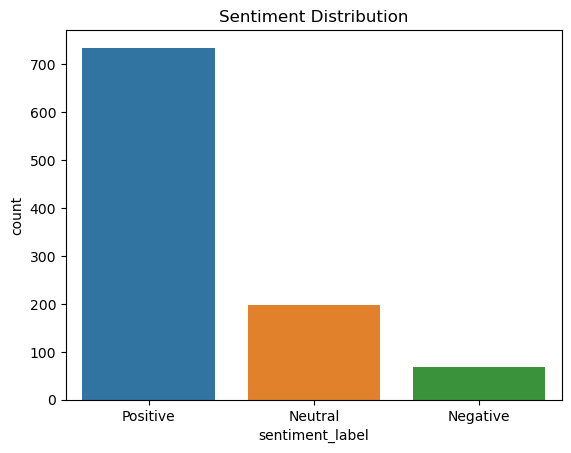

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
sns.countplot(x='sentiment_label', data=df_reviews)
plt.title('Sentiment Distribution')
plt.show()




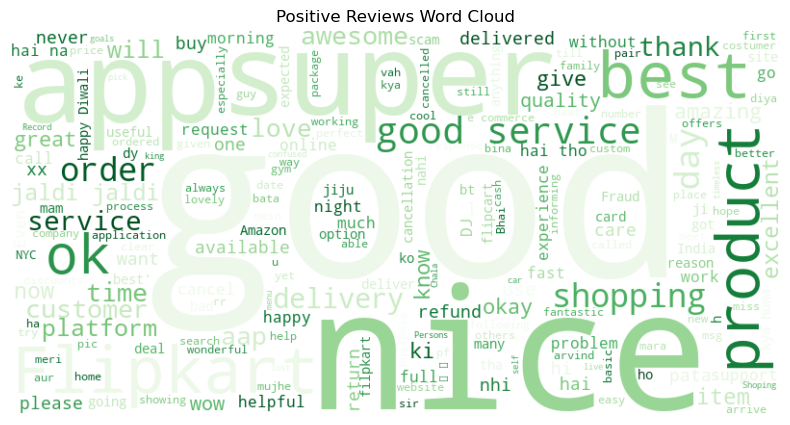

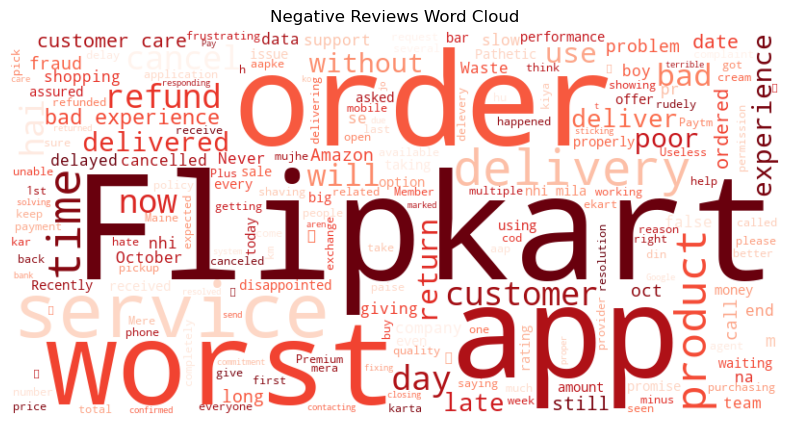

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(text, title, color_map):
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          colormap=color_map).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Prepare text for word clouds
positive_reviews = ' '.join(df_reviews[df_reviews['sentiment_label'] == 'Positive']['content'])
negative_reviews = ' '.join(df_reviews[df_reviews['sentiment_label'] == 'Negative']['content'])

# Create word clouds with specified color maps
create_wordcloud(positive_reviews, "Positive Reviews Word Cloud", color_map='Greens')  # Blue shades for positive
create_wordcloud(negative_reviews, "Negative Reviews Word Cloud", color_map='Reds')  # Red shades for negative
